In [1]:
from qerr_utils import *

In [2]:
experiment_dir = 'data/start_2024-06-28T11:14:58.966542'
fpath = experiment_dir + '/' + 'data-type_MERGED.start_2024-06-28T11:14:58.966542'
fpath_nav = '/Users/nico/panoseti/gnss-pdft/qerr/data/start_2024-06-28T11:34:57.083680.device_tty.usbmodem11301/data-type_NAV-TIMEUTC.start_2024-06-28T11:34:57.083680'
fpath_tim = '/Users/nico/panoseti/gnss-pdft/qerr/data/start_2024-06-28T11:34:57.083680.device_tty.usbmodem11301/data-type_TIM-TP.start_2024-06-28T11:34:57.083680'

nav_df = load_data(fpath_nav)
tim_df = load_data(fpath_tim)

In [5]:
tim_df

,pkt_unix_timestamp_TIM-TP,towMS (ms),towSubMS,qErr (ps),week (weeks),timeBase_flag,utc_flag,raim_flag,qErrInvalid_flag,timeRefGnss,utcStandard_TIM-TP
0,2024-06-28 11:34:58.049811,498917000,0.0,-2166,2320,0,1,2,0,0,0
1,2024-06-28 11:34:59.058307,498918000,0.0,-2078,2320,0,1,2,0,0,0
2,2024-06-28 11:35:00.056532,498919000,0.0,-2222,2320,0,1,2,0,0,0
3,2024-06-28 11:35:01.057155,498920000,0.0,-2868,2320,0,1,2,0,0,0
4,2024-06-28 11:35:02.049869,498921000,0.0,-1356,2320,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
720,2024-06-28 11:46:58.068418,499637000,0.0,-1576,2320,0,1,2,0,0,0
721,2024-06-28 11:46:59.066719,499638000,0.0,198,2320,0,1,2,0,0,0
722,2024-06-28 11:47:00.072470,499639000,0.0,1961,2320,0,1,2,0,0,0
723,2024-06-28 11:47:01.070875,499640000,0.0,3730,2320,0,1,2,0,0,0


In [7]:
nav_df.columns

Index(['pkt_unix_timestamp_NAV-TIMEUTC', 'iTOW (ms)', 'tAcc (ns)', 'year',
       'month', 'day', 'hour', 'min', 'sec', 'validTOW_flag', 'validWKN_flag',
       'validUTC_flag', 'utcStandard_NAV-TIMEUTC'],
      dtype='object')

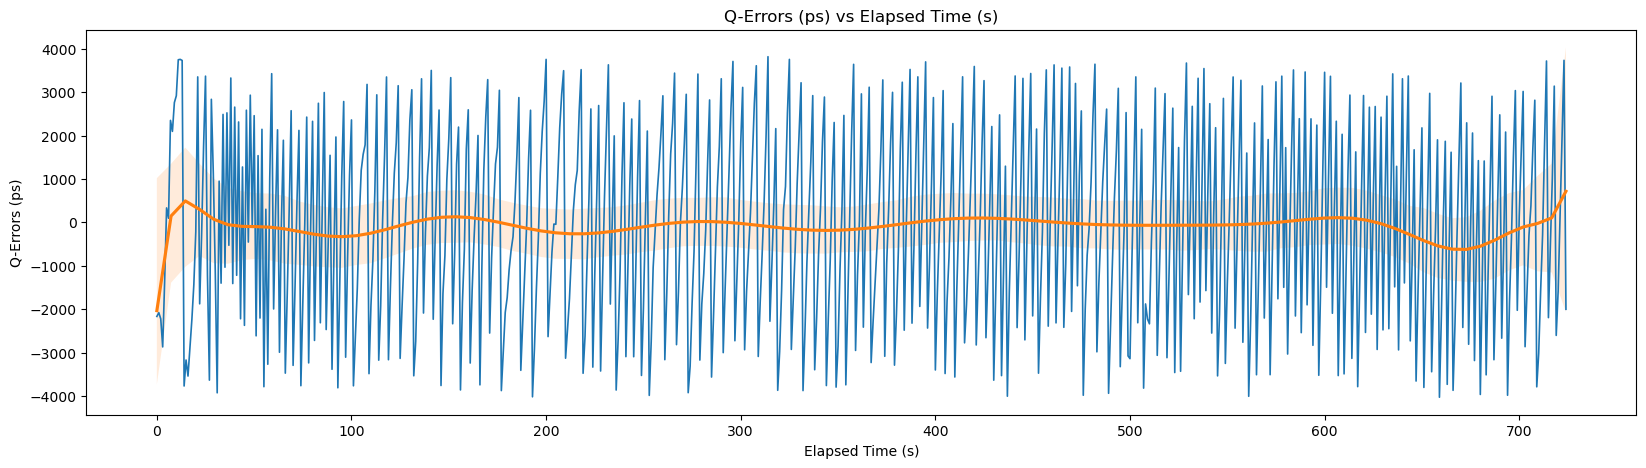

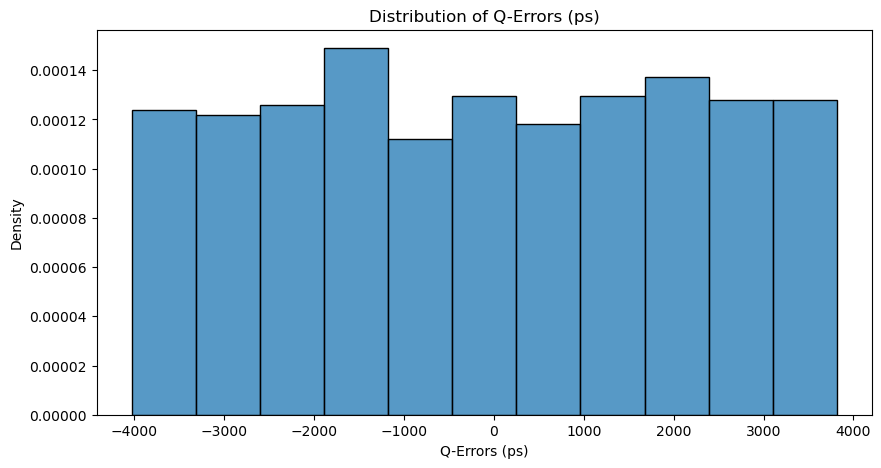

In [32]:
def qerr_vs_time(df):
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    df['seconds elapsed'] = (df['towMS (ms)'] - df['towMS (ms)'].min()) / 10**3
    sns.lineplot(df, x='seconds elapsed', y='qErr (ps)', linewidth=1.2, ax=ax)
    sns.regplot(df, x='seconds elapsed', y='qErr (ps)', scatter=False, ax=ax, order=17)
    
    ax.set_title('Q-Errors (ps) vs Elapsed Time (s)');
    ax.set_xlabel('Elapsed Time (s)')
    ax.set_ylabel('Q-Errors (ps)')

def qerr_hist(df):
    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.histplot(df, x='qErr (ps)', stat='density', ax=ax)
    ax.set_title('Distribution of Q-Errors (ps)')
    ax.set_xlabel('Q-Errors (ps)');
qerr_vs_time(qerr_df)
qerr_hist(qerr_df)